<a href="https://colab.research.google.com/github/newbiepawel/time_series/blob/master/S%26P_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 12.1 GB  | Proc size: 1.3 GB
GPU RAM Free: 11257MB | Used: 184MB | Util   2% | Total 11441MB


In [0]:
!kill -9 -1

In [17]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 12.1 GB  | Proc size: 1.3 GB
GPU RAM Free: 11257MB | Used: 184MB | Util   2% | Total 11441MB


In [0]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [0]:
df = pdr.get_data_yahoo('^GSPC','10/18/2010',interval='d')

In [79]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-10-18,1185.530029,1174.550049,1176.829956,1184.709961,4450050000,1184.709961
2010-10-19,1178.640015,1159.709961,1178.640015,1165.900024,5600120000,1165.900024
2010-10-20,1182.939941,1166.739990,1166.739990,1178.170044,5027880000,1178.170044
2010-10-21,1189.430054,1171.170044,1179.819946,1180.260010,4625470000,1180.260010
2010-10-22,1183.930054,1178.989990,1180.520020,1183.079956,3177890000,1183.079956


In [0]:
df_train =df.iloc[0:-100, 2:3].values

In [0]:
df_test = df.iloc[-100:,2:3].values

In [6]:
print(f'training set consists of {len(df_train)} records', '\n', f'test set consists of {len(df_test)} records')

training set consists of 2166 records 
 test set consists of 100 records


In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(df_train)

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(70, 2166):
    X_train.append(training_set_scaled[i-70:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras

Using TensorFlow backend.


In [11]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
early_stop = keras.callbacks.EarlyStopping(monitor='loss', patience=20, verbose=0)

In [13]:
history = regressor.fit(X_train, y_train, epochs = 400, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/400





2096/2096 [==============================] - 16s 8ms/step - loss: 0.0278
Epoch 2/400
2096/2096 [==============================] - 13s 6ms/step - loss: 0.0041
Epoch 3/400
2096/2096 [==============================] - 13s 6ms/step - loss: 0.0037
Epoch 4/400
2096/2096 [==============================] - 13s 6ms/step - loss: 0.0030
Epoch 5/400
2096/2096 [==============================] - 13s 6ms/step - loss: 0.0033
Epoch 6/400
2096/2096 [==============================] - 13s 6ms/step - loss: 0.0033
Epoch 7/400
2096/2096 [==============================] - 13s 6ms/step - loss: 0.0028
Epoch 8/400
2096/2096 [==============================] - 13s 6ms/step - loss: 0.0027
Epoch 9/400
2096/2096 [==============================] - 13s 6ms/step - loss: 0.0027
Epoch 10/400
2096/2096 [==============================] - 13s 6ms/step - loss: 0.0024
Epoch 11/400
2096/2096 [=======================

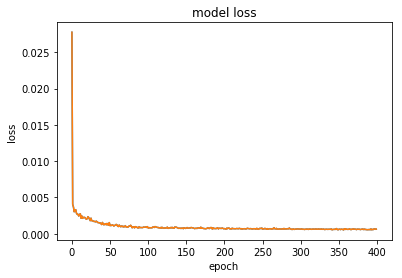

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [0]:
lol = df['Open']
inputs = lol[len(lol) - len(df_test) - 70:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [16]:
inputs.shape

(170, 1)

In [0]:
X_test = []
for i in range(70, 170):
    X_test.append(inputs[i-70:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [50]:
X_test.shape

(100, 70, 1)

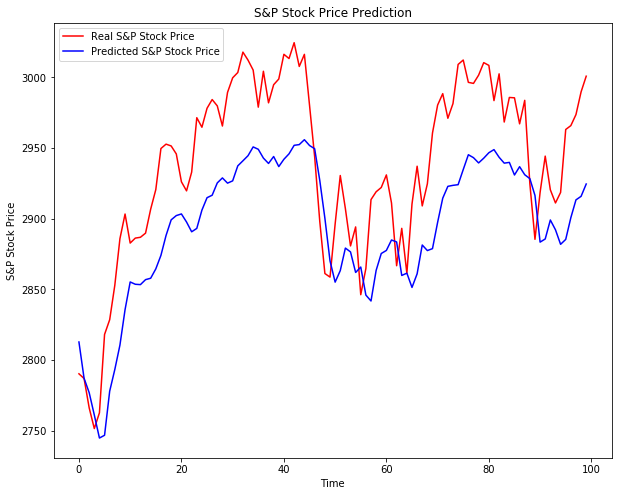

In [46]:
# Visualising the results
plt.figure(figsize = (10,8))
plt.plot(df_test, color = 'red', label = 'Real S&P Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted S&P Stock Price')
plt.title('S&P Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend(loc = 'best')
plt.show()

In [20]:
yo= pd.concat([pd.DataFrame(df_test), pd.DataFrame(predicted_stock_price)], axis = 1, names = ['real', 'pred'])
yo.columns = ['true', 'pred'] 
yo.head()

,true,pred
0,2790.250000,2812.748779
1,2786.939941,2787.096436
2,2766.149902,2776.893799
3,2751.530029,2761.094727
4,2762.639893,2744.816650


In [24]:
yo['resid'] = yo['true'] - yo['pred']
yo['|resid|'] = np.abs(yo['resid'])
yo.head()

,true,pred,resid,|resid|
0,2790.250000,2812.748779,-22.498779,22.498779
1,2786.939941,2787.096436,-0.156494,0.156494
2,2766.149902,2776.893799,-10.743896,10.743896
3,2751.530029,2761.094727,-9.564697,9.564697
4,2762.639893,2744.816650,17.823242,17.823242


In [27]:
print('mean error:', yo['resid'].mean(), '\n', 'mean abs error:',  yo['|resid|'].mean())

mean error: 43.85251953125 
 mean abs error: 47.83748046875


In [37]:
yo['pred+resid'] = yo['pred']+ yo['resid'].mean()
yo['pred+|resid|'] = yo['pred']+ yo['|resid|'].mean()
yo.head()

,true,pred,resid,|resid|,pred+resid,pred+|resid|
0,2790.250000,2812.748779,-22.498779,22.498779,2856.601318,2860.586182
1,2786.939941,2787.096436,-0.156494,0.156494,2830.948975,2834.933838
2,2766.149902,2776.893799,-10.743896,10.743896,2820.746338,2824.731201
3,2751.530029,2761.094727,-9.564697,9.564697,2804.947266,2808.932129
4,2762.639893,2744.816650,17.823242,17.823242,2788.669189,2792.654053


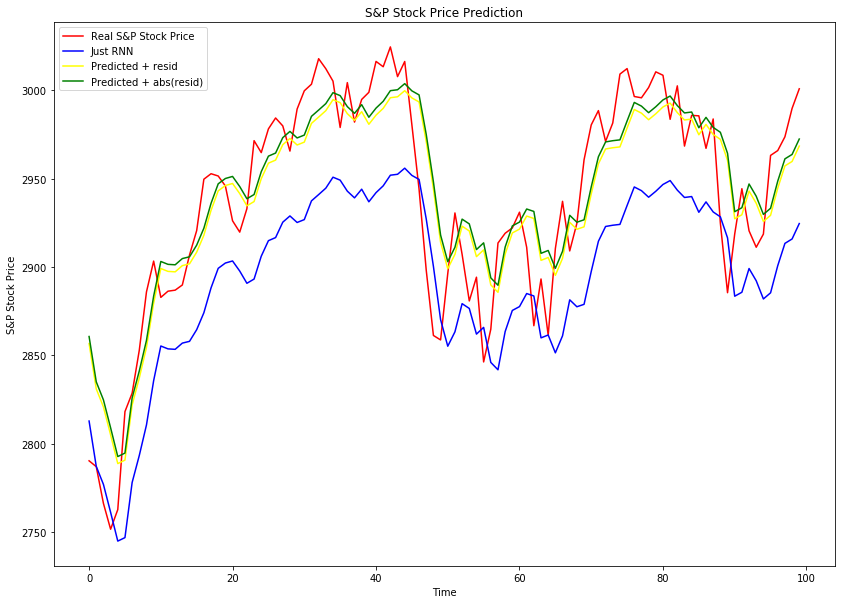

In [43]:
plt.figure(figsize = (14,10))
plt.plot(df_test, color = 'red', label = 'Real S&P Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Just RNN ')
plt.plot(yo['pred+resid'], color = 'yellow', label = 'Predicted + resid')
plt.plot(yo['pred+|resid|'], color = 'green', label = 'Predicted + abs(resid)')

plt.title('S&P Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('S&P Stock Price')
plt.legend()
plt.show()

In [0]:
a = regressor.predict(X_test[0].reshape(1, 70, 1))

In [62]:
a = sc.inverse_transform(a)
a

array([[2812.7488]], dtype=float32)

In [66]:
X_test.shape

(100, 70, 1)

In [102]:
a = sc.fit_transform(df.iloc[-70:, 2:3].values)
len(a)

70

In [77]:
sc.inverse_transform(X_test.reshape(100,70))

array([[2996.20495711, 2997.53514978, 2998.97275511, ..., 3007.45562527,
        3006.82436931, 3006.47418247],
       [2997.53514978, 2998.97275511, 2999.14784853, ..., 3006.82436931,
        3006.47418247, 3000.62076712],
       [2998.97275511, 2999.14784853, 2999.21111064, ..., 3006.47418247,
        3000.62076712, 3000.13370997],
       ...,
       [3028.50760911, 3026.41079897, 3029.90990119, ..., 3019.49942278,
        3026.05030196, 3026.45347665],
       [3026.41079897, 3029.90990119, 3031.42844322, ..., 3026.05030196,
        3026.45347665, 3027.60121149],
       [3029.90990119, 3031.42844322, 3031.97876248, ..., 3026.45347665,
        3027.60121149, 3029.96579888]])

In [0]:
prediction_for_tomorrow = regressor.predict(a.reshape(1, 70, 1))

In [106]:
print(f'predicted Open S&P price for 10/19/2019 is:{sc.inverse_transform(prediction_for_tomorrow) + yo.iloc[:, 2].mean()}')
print(f'predicted Open S&P price for 10/19/2019 with just RNN is:{sc.inverse_transform(prediction_for_tomorrow)}')

predicted Open S&P price for 10/19/2019 is:[[3036.128]]
predicted Open S&P price for 10/19/2019 with just RNN is:[[2992.2754]]


In [86]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-11,2993.280029,2963.070068,2963.070068,2970.270020,3580460000,2970.270020
2019-10-14,2972.840088,2962.939941,2965.810059,2966.149902,2557020000,2966.149902
2019-10-15,3003.280029,2973.610107,2973.610107,2995.679932,3340740000,2995.679932
2019-10-16,2997.540039,2985.199951,2989.679932,2989.689941,3222570000,2989.689941
2019-10-17,3008.290039,2991.790039,3000.770020,2997.949951,3115960000,2997.949951


In [99]:
pd.DataFrame(sc.inverse_transform(a)).tail()

,0
65,2918.550049
66,2963.070068
67,2965.810059
68,2973.610107
69,2989.679932
